# Chapter 6. AI 기초 - Classification
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/
----------------------
* Classification : 소속 집단의 정보를 이미 알고 있는 상태에서 비슷한 집단으로 묶는 방법
* Clustering : 소속 집단의 정보가 없는 상태에서 비슷한 집단으로 묶는 방법

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. KNN Classifier
* 알고리즘이 매우 단순하고, 직관적이며, 사전 학습이나 특별한 준비 시간이 필요 없다는 장점이 있다.
* 데이터 인스턴스, 클래스, 특징의 요소들의 개수가 많다면, 많은 메모리 공간과 계산 시간이 필요하다는 단점이 있다.
* 데이터가 많을 때 적절한 모델이라고 보기는 힘들다.

## Ex) 으뜸 머신러닝 p.134

### Data

In [2]:
# 닥스훈트
d_l = [77,78,85,83,73,77,73,80]
d_h = [25,28,29,30,21,22,17,35]
# 사모예드
s_l = [75,77,86,86,79,83,83,88]
s_h = [56,57,50,53,60,53,49,61]

### Scatter Plot

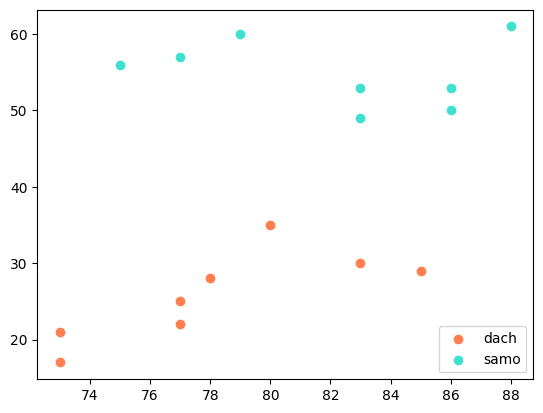

In [3]:
plt.figure()

plt.scatter(d_l, d_h, label = 'dach', color = 'coral')
plt.scatter(s_l, s_h, label = 'samo', color = 'turquoise')

plt.legend(loc = 'lower right')
plt.show()

### New Data 1

In [4]:
new_l = [79]
new_h = [35]

#### Scatter Plot

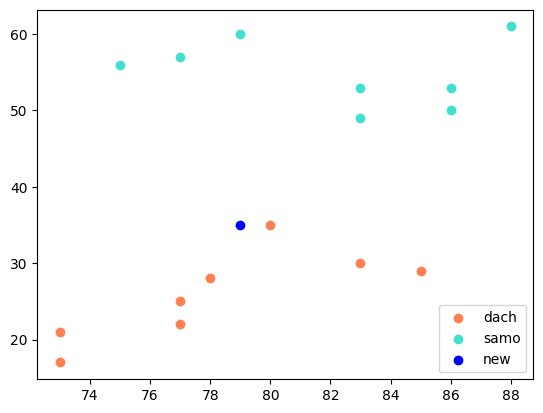

In [5]:
plt.figure()

plt.scatter(d_l, d_h, label = 'dach', color = 'coral')
plt.scatter(s_l, s_h, label = 'samo', color = 'turquoise')
plt.scatter(new_l, new_h, label = 'new', color = 'b')

plt.legend(loc = 'lower right')
plt.show()

* 새로운 데이터는 닥스훈트라고 볼 수 있다.

### New Data 2

In [6]:
new_l = [82]
new_h = [40]

#### Scatter Plot

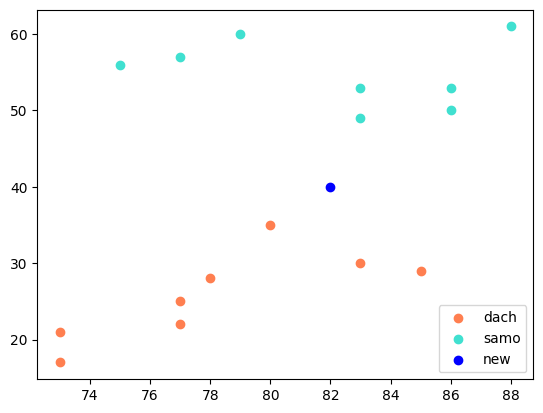

In [7]:
plt.figure()

plt.scatter(d_l, d_h, label = 'dach', color = 'coral')
plt.scatter(s_l, s_h, label = 'samo', color = 'turquoise')
plt.scatter(new_l, new_h, label = 'new', color = 'b')

plt.legend(loc = 'lower right')
plt.show()

* 새로운 데이터가 어떤 품종인지 그래프로는 파악이 어렵다.

### Modeling

#### Data

In [8]:
# 닥스훈트
X_d = np.column_stack([d_l,d_h])
Y_d = np.zeros(len(X_d))
# 사모예드
X_s = np.column_stack([s_l,s_h])
Y_s = np.ones(len(X_s))
# Train Data
X_train = np.concatenate([X_d, X_s])
Y_train = np.concatenate([Y_d, Y_s])
# New Data
X_test = np.array([[82,40]])

#### KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

In [10]:
knn = KNNC(n_neighbors = 3)
knn.fit(X_train, Y_train)

knn.predict(X_test)

array([0.])

* 0 : 닥스훈트로 예측

# 2. Confusion Matrix
## 이진 분류
* 이진 분류에서 데이터 수가 작은 것을 1로 설정, 데이터 수가 많은 것을 0으로 설정하는 것이 좋다.
## F1-score
* 재현율과 정밀도라는 각각의 지표는 관심있는 척도가 다르기 때문에 하나의 척도만을 측정 방법으로 사용할 경우 왜곡이 발생하는데 이를 해결하기 위한 방법이 F1-score
* 두 지표(재현율과 정밀도)의 조화 평균이 F1-score
* 0과 1의 비율이 같다면 F1-score는 Accuracy와 같은 값

### Ex)

In [11]:
target = np.array([0] * 15 + [1] * 5)
pred = np.array([0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1])
print('target : {}, pred : {}'.format(len(target),len(pred)))

target : 20, pred : 20


In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(target, pred)

array([[7, 8],
       [2, 3]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [15]:
print('Accuracy  : {:.4f}'.format(accuracy_score(target, pred)))
print('Precision : {:.4f}'.format(precision_score(target, pred)))
print('Recall    : {:.4f}'.format(recall_score(target, pred)))
print('F1-score  : {:.4f}'.format(f1_score(target, pred)))

Accuracy  : 0.5000
Precision : 0.2727
Recall    : 0.6000
F1-score  : 0.3750


## ROC Curve, ROC-AUC
* 로지스틱 회귀처럼 0인지, 1인지에 대한 확률이 변하는 값을 나타내는 그래프
* ROC Curve가 직선으로 나온다면 학습이 전혀 진행되지 않아 무작위로 값을 추출하고 있다고 판단
* F1-score가 같더라도 ROC-AUC가 높다면 학습이 잘 되었다고 판단하기 때문에 모델에 대해 더 확신을 가질 수 있음
* ROC-AUC는 이진 분류 문제에서만 활용이 가능하고, Multi Class에는 적용할 수 없음

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [17]:
raw_data = load_iris()

X = raw_data.data
Y = raw_data.target

X = X[Y != 0][:, [0, 2]]
Y = Y[Y != 0] - 1

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = Y)

lr_model = LogisticRegression(solver = 'liblinear',
                              C = 0.00001,
                              random_state = 1)
lr_model.fit(X_train, Y_train)

LogisticRegression(C=1e-05, random_state=1, solver='liblinear')

In [19]:
prob = lr_model.predict_proba(X_test)
fpr, tpr, thres = roc_curve(Y_test, prob[:, 1])
print('FPR\n',fpr)
print('\nTPR\n',tpr)

FPR
 [0.         0.         0.         0.         0.06666667 0.06666667
 0.13333333 0.13333333 0.2        0.2        0.73333333 0.86666667
 1.        ]

TPR
 [0.         0.06666667 0.66666667 0.8        0.8        0.86666667
 0.86666667 0.93333333 0.93333333 1.         1.         1.
 1.        ]


In [20]:
roc_auc_score(Y_test, prob[:, 1])

0.9733333333333333

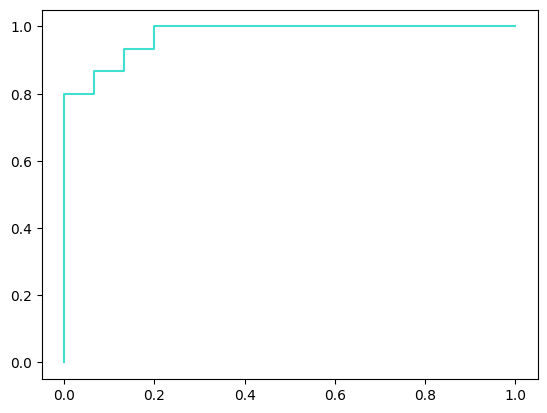

In [21]:
plt.figure()

plt.plot(fpr, tpr, color = 'turquoise')

plt.show()

# 3. Ensemble

## Bagging
* 분류기에 선택된 데이터가 다른 분류기의 학습에도 사용될 수 있는 방법

In [22]:
from sklearn.datasets import load_wine

In [23]:
raw_data = load_wine()
X = raw_data.data
Y = raw_data.target

In [24]:
X = X[Y != 2]
Y = Y[Y != 2]

In [25]:
from sklearn.ensemble import BaggingClassifier as BC

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = Y)

lr_model = LogisticRegression(solver = 'liblinear',
                              C = 1,
                              random_state = 1)
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)

bc_model = BC(base_estimator = lr_model,
              n_estimators = 500,
              n_jobs = -1)
bc_model.fit(X_train, Y_train)
bc_pred = bc_model.predict(X_test)

In [27]:
print("Logistic Regression F1-score")
print('{:.4f}'.format(f1_score(Y_test, lr_pred)))

print('\nBagging F1-score')
print('{:.4f}'.format(f1_score(Y_test, bc_pred)))

Logistic Regression F1-score
0.9524

Bagging F1-score
0.9756


## Boosting
### AdaBoost
* Boosting의 가장 대표적인 방법
* 각 데이터 인스턴스를 동일한 가중치로 초기화하여 예측기를 순차적으로 학습
* 한 예측기가 잘못 분류한 데이터 인스턴스의 가중치를 높임
* 다음 예측기는 높은 가중치의 데이터 인스턴스에 적합하게 학습
* 각각의 모델이 과소적합이 잦아 데이터 수가 적을 때 성능이 떨어질 수 있다.

In [28]:
from sklearn.ensemble import AdaBoostClassifier as AC

In [29]:
ac_model = AC(base_estimator = lr_model,
              n_estimators = 500)
ac_model.fit(X_train, Y_train)
ac_pred = ac_model.predict(X_test)
print('AdaBoost F1-score')
print('{:.4f}'.format(f1_score(Y_test, ac_pred)))

AdaBoost F1-score
0.9000


# 4. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier as DTC

## Data

In [31]:
raw_data = load_iris()

X = raw_data.data
Y = raw_data.target

## Modeling

In [32]:
dtc_model = DTC(max_depth = 3)
dtc_model.fit(X, Y)

DecisionTreeClassifier(max_depth=3)

## Tree Visualization

In [33]:
from sklearn.tree import plot_tree

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]

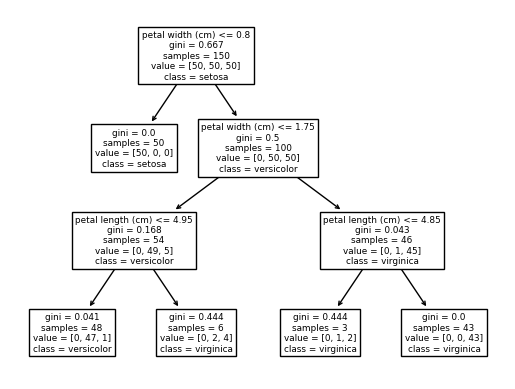

In [34]:
plot_tree(dtc_model, 
          feature_names = raw_data.feature_names,
          class_names = raw_data.target_names)